In [3]:
import datetime
import calendar
import csv
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import pyttsx3
import PyPDF2

from collections import defaultdict, Counter
from tkinter.filedialog import *

sb.set()

In [2]:
#Assume the current date is when our customer took a loan
#Calculate the total days, date and amount of full loan payment, given the interest rate of 0.13
#and a monthly pay target

bal = 5000
interest = 0.13
monthlyPay = 700

loanTakenDate = datetime.date.today()
endMonth = calendar.monthrange(year = loanTakenDate.year, month = loanTakenDate.month)[1]
daysLeftToEndMonth = endMonth - loanTakenDate.day
nextMonthStartDate = loanTakenDate + datetime.timedelta(days = daysLeftToEndMonth + 1)
nextLoanStartDate = nextMonthStartDate
totalDays = 0

while bal > 0:
    intRate = (interest / 12) * bal #Calculate the interest rate per month
    bal += intRate
    bal -= monthlyPay
    bal = round(bal, 2)
    totalDays += 1
    
    if bal < 0:
        bal = 0
    print(f"{nextLoanStartDate}: {bal}")
    
    endMonth = calendar.monthrange(nextLoanStartDate.year, nextLoanStartDate.month)[1]
    nextLoanStartDate = nextLoanStartDate + datetime.timedelta(days = endMonth)
print(f"It took {totalDays} months to repay your loan in full.")

2020-09-01: 4354.17
2020-10-01: 3701.34
2020-11-01: 3041.44
2020-12-01: 2374.39
2021-01-01: 1700.11
2021-02-01: 1018.53
2021-03-01: 329.56
2021-04-01: 0
It took 8 months to repay your loan in full.


In [3]:
#Given the weight of a collegue weighing 220 pounds whose aim is to lose upto 150 pounds 
#on an average loosing of 1.8 kgs per week
#Determine the date to achieve the targeted weight??
#Assuming the current date is the first day at the gym

currentWeight = 160
avgWeekLoss = 1.8
targetWeight = 150

gymStartDate = datetime.date.today()

while currentWeight > targetWeight:
    currentWeight -= avgWeekLoss
    currentWeight = round(currentWeight, 2)
    gymStartDate += datetime.timedelta(days = 7)
    print(f"{gymStartDate}: {currentWeight}")

2020-09-05: 158.2
2020-09-12: 156.4
2020-09-19: 154.6
2020-09-26: 152.8
2020-10-03: 151.0
2020-10-10: 149.2


In [6]:
#Using the data in SOF 2020 csv file, determine the number of reaspondent that 
#desire to learn Pyhton next year

with open("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2020\survey_results_public.csv", encoding = "utf-8") as file:
    fileReader = csv.DictReader(file)
    fileCounter = Counter()
    totalLang = 0
    #for line in fileReader:
        #print(line)
        #break
    
    for languages in fileReader:
        
        language = languages["LanguageDesireNextYear"].split(";")
        
        for lang in language:
            fileCounter[lang] += 1
            totalLang += 1
        
    for pl, val in fileCounter.most_common(5):
        languagePercentage = (val / totalLang) * 100
        languagePercentage = round(languagePercentage, 2)
        print(f"{pl}: {languagePercentage}")

print("")
print("")

Python: 10.73
JavaScript: 10.53
HTML/CSS: 8.35
SQL: 8.03
TypeScript: 6.9




In [5]:
df = pd.read_csv("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2019\survey_results_public.csv", index_col = "Respondent")
schemaDf = pd.read_csv("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2019\survey_results_schema.csv", index_col = "Column")
pd.set_option("display.max_rows", 85)
schemaDf.sort_index(inplace = True)
schemaDf

,QuestionText
Column,
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
BetterLife,Do you think people born today will have a bet...
BlockchainIs,Blockchain / cryptocurrency technology is prim...
BlockchainOrg,How is your organization thinking about or imp...
CareerSat,"Overall, how satisfied are you with your caree..."
CodeRev,Do you review code as part of your work?
CodeRevHrs,"On average, how many hours per week do you spe..."
CompFreq,"Is that compensation weekly, monthly, or yearly?"


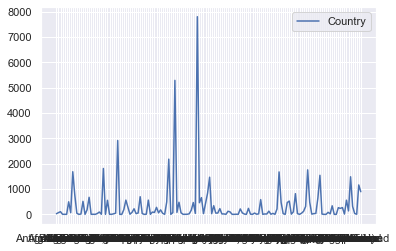

Afghanistan      26
Albania          70
Algeria         107
Andorra           4
Angola            3
               ... 
Sri Lanka       315
Sudan            36
Swaziland         6
Sweden         1162
Switzerland     895
Name: Country, Length: 150, dtype: int64

In [6]:
countryGrp = df.groupby("Gender")
grpKePython = countryGrp.get_group("Man")
plot = round((grpKePython["Country"].value_counts(normalize = False)), 2).sort_index(ascending = True).head(150)
pd.set_option("display.max_rows", 50)
plt.plot(plot, label = "Country")
plt.legend(loc = "best")
plt.show()
plot

In [7]:
countryGrp = df.groupby("Country")
#grpKeLang = countryGrp.get_group("Yes")
round((countryGrp["LanguageWorkedWith"].value_counts(normalize = False)), 2).loc["United States"]

LanguageWorkedWith
C#;HTML/CSS;JavaScript;SQL                                     390
HTML/CSS;JavaScript                                            282
C#;HTML/CSS;JavaScript;SQL;TypeScript                          270
HTML/CSS;JavaScript;PHP;SQL                                    207
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript    177
                                                              ... 
R;Scala;SQL                                                      1
Ruby;Rust                                                        1
Ruby;Scala;SQL                                                   1
Swift;TypeScript                                                 1
TypeScript;Other(s):                                             1
Name: LanguageWorkedWith, Length: 7669, dtype: int64

In [8]:
schemaDf.loc["Containers", "QuestionText"]
df["Containers"].value_counts()

I do not use containers                                                  39327
Development;Testing;Production                                            7731
Development;Testing;Production;Outside of work, for personal projects     6835
Development                                                               6202
Outside of work, for personal projects                                    6123
Development;Testing                                                       4114
Development;Testing;Outside of work, for personal projects                2496
Development;Production                                                    2243
Testing                                                                   2185
Development;Outside of work, for personal projects                        2178
Production                                                                2149
Testing;Production                                                        1469
Development;Production;Outside of work, for personal

In [9]:
with open("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2019\survey_results_public.csv", encoding = "utf-8")as cont:
    contReader = csv.DictReader(cont)
    contDict = Counter()
    totalLang = 0
    
    for lines in contReader:
        #contDict.update(line["DatabaseWorkedWith"].split(";"))
        line = lines["DatabaseWorkedWith"].split(";")
        totalLang += 1
        
        for i in line:
            contDict[i] += 1
            
for lang, val in contDict.most_common(5):
    langPercent = (val / totalLang) * 100
    langPercent = round(langPercent, 2)
    print(f"{lang} : {langPercent}")

            
#print(contDict.most_common(5))

MySQL : 45.61
PostgreSQL : 28.98
Microsoft SQL Server : 27.67
SQLite : 26.68
MongoDB : 21.49


In [10]:
df["WebFrameWorkedWith"].dropna()

Respondent
1                                       Django;Flask
2                                             Django
5        Django;Express;Flask;jQuery;React.js;Spring
7                                           React.js
8                      Express;Flask;React.js;Spring
                            ...                     
88182                                      Other(s):
88212                                Django;React.js
88282                                       React.js
88377                                         jQuery
88863                         Django;jQuery;React.js
Name: WebFrameWorkedWith, Length: 65022, dtype: object

In [11]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [12]:
devType = df.groupby("OpSys")
devType["DevEnviron"].value_counts().sample()

OpSys  DevEnviron                      
MacOS  Atom;Emacs;Sublime Text;TextMate    1
Name: DevEnviron, dtype: int64

In [13]:
with open("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2020\survey_results_public.csv", encoding = "utf-8")as file:
    fileReader = csv.DictReader(file)
    #.dropna(axis = "index", how = "any")
    fileCounter = Counter()
    totalCount = 0
    
    for devTypes in fileReader:
        devType = devTypes["LanguageWorkedWith"].split(";")
        totalCount += 1
        
        for dev in devType:
            fileCounter[dev] += 1
        
for lang, val in fileCounter.most_common():
    langPercentage = (val / totalCount) * 100
    langPercentage = round(langPercentage, 2)
    print(f"{lang} : \t{langPercentage}")


JavaScript : 	60.23
HTML/CSS : 	56.13
SQL : 	48.73
Python : 	39.23
Java : 	35.8
Bash/Shell/PowerShell : 	29.44
C# : 	27.99
PHP : 	23.28
TypeScript : 	22.62
C++ : 	21.26
C : 	19.37
NA : 	10.99
Go : 	7.82
Kotlin : 	6.93
Ruby : 	6.28
Assembly : 	5.51
VBA : 	5.43
Swift : 	5.27
R : 	5.1
Rust : 	4.54
Objective-C : 	3.63
Dart : 	3.54
Scala : 	3.18
Perl : 	2.79
Haskell : 	1.9
Julia : 	0.81


In [14]:
df.head(10)
pd.set_option("display.max_columns", 85)
df

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-package

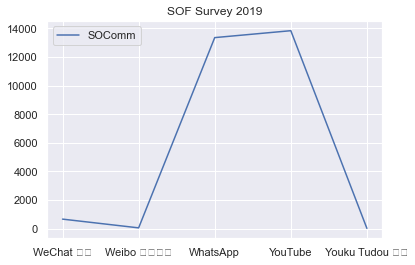

WeChat 微信           667
Weibo 新浪微博           56
WhatsApp          13347
YouTube           13830
Youku Tudou 优酷       21
Name: SocialMedia, dtype: int64

In [15]:
countryGrp = df.groupby("OpSys")
#getCountry = countryGrp.get_group("Windows")
sal = round((df["SocialMedia"].value_counts(normalize = False)), 2).sort_index(ascending = True).tail(5)
plt.plot(sal, color = "b", label = "SOComm")
plt.title("SOF Survey 2019")
plt.legend(loc = "best")
plt.show()
sal

In [16]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [17]:
schemaDf.loc["OffOn", "QuestionText"]
df["ResumeUpdate"].value_counts()

I was preparing for a job search                                                33309
My job status changed (promotion, new job, etc.)                                13546
Something else changed (education, award, media, etc.)                          11986
I heard about a job opportunity (from a recruiter, online job posting, etc.)    11327
I had a negative experience or interaction at work                               6272
Re-entry into the workforce                                                      1437
Name: ResumeUpdate, dtype: int64

In [18]:
salFilt = (df["ConvertedComp"] <= 100000 ) & (df["Country"] == "United States")
pd.set_option("display.max_rows", 85)
df.loc[salFilt, ["OpSys", "DevType"]].head(85).dropna(axis = "index", how = "any")

#Using csv module to return the total num of respondents with their DevType
with open("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2020\survey_results_public.csv", encoding = "utf-8")as file:
    fileReader = csv.DictReader(file)
    
    fileCounter = Counter()
    for dev in fileReader:
        devTypes = dev["DevType"].split(";")
        
        for devType in devTypes:
            fileCounter[devType] += 1
print(schemaDf.loc["DevType", "QuestionText"])  
print()
print()
for devtype, resp in fileCounter.most_common():
    print(f"{devtype}: {resp}")

Which of the following describe you? Please select all that apply.


Developer, back-end: 27228
Developer, full-stack: 27125
Developer, front-end: 18296
NA: 15091
Developer, desktop or enterprise applications: 11784
Developer, mobile: 9482
DevOps specialist: 5969
Database administrator: 5722
Designer: 5321
System administrator: 5242
Developer, embedded applications or devices: 4750
Data or business analyst: 4024
Data scientist or machine learning specialist: 3988
Developer, QA or test: 3947
Engineer, data: 3738
Academic researcher: 3552
Educator: 2928
Developer, game or graphics: 2789
Engineering manager: 2724
Product manager: 2497
Scientist: 2086
Engineer, site reliability: 1940
Senior executive/VP: 1320
Marketing or sales professional: 642


In [19]:
displayCountry = ["United States", "Kenya", "Canada", "China", "Brazil", "Australia", "Spain", "Italy"]
filt = df["Country"].isin(displayCountry)
ke = df["Country"].str.contains("Kenya")
df.loc[filt, ["Country", "OpSys"]].head(10)

,Country,OpSys
Respondent,,
4,United States,Windows
6,Canada,Windows
12,Canada,MacOS
13,United States,Windows
17,Australia,Linux-based
19,Brazil,MacOS
21,Canada,Linux-based
22,United States,Windows
23,United States,MacOS


In [20]:
#Multiplication table accepting the range of num from input
num = int(input("Enter a value: "))
for row in range(1, num + 1):
    for col in range(1, num + 1):
        product = row * col
        print("{0:4}".format(product), end = "  ")
    print()

Enter a value:  10


   1     2     3     4     5     6     7     8     9    10  
   2     4     6     8    10    12    14    16    18    20  
   3     6     9    12    15    18    21    24    27    30  
   4     8    12    16    20    24    28    32    36    40  
   5    10    15    20    25    30    35    40    45    50  
   6    12    18    24    30    36    42    48    54    60  
   7    14    21    28    35    42    49    56    63    70  
   8    16    24    32    40    48    56    64    72    80  
   9    18    27    36    45    54    63    72    81    90  
  10    20    30    40    50    60    70    80    90   100  


In [21]:
def fun(*args, **kwargs):
    for i in args:
        print(i, end = " ")
    for i in kwargs:
        print(i, end = " ")

fun("Robin", age = 20, percentage = 80)      

Robin age percentage 

In [22]:
names = ["Churchill", "Antonie", "Baken", "Shirlyne"]
names[-1][-1]

'e'

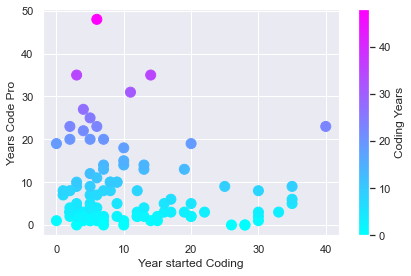

In [23]:
#Open a csv file
df = pd.read_csv("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2019\survey_results_public.csv", index_col = "Respondent")

#Clean the data to the specific format
#Years Code
lessThanOne = df["YearsCode"].replace("Less than 1 year", 0, inplace = True)
greaterThanFifty = df["YearsCode"].replace("More than 50 years", 0, inplace = True)
#Years Code Pro
BelowOne = df["YearsCodePro"].replace("Less than 1 year", 0, inplace = True)
aboveFifty = df["YearsCodePro"].replace('More than 50 years', 51, inplace = True)

#Assign variables to specific columns
yearsCode = df["YearsCode"].dropna(axis = "index", how = "all").astype(int).head(100)
yearsCodePro = df["YearsCodePro"].dropna(axis = "index", how = "all").astype(int).head(100)

#plotting process 😷😷
plt.scatter(yearsCode, yearsCodePro, s = 100, c = yearsCodePro, cmap = "cool")

cbar = plt.colorbar()
cbar.set_label("Coding Years")
plt.xlabel("Year started Coding")
plt.ylabel("Years Code Pro")
plt.tight_layout()
plt.show()



In [27]:
df = pd.read_csv("D:\Open Classroom\Data Files\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [28]:
df["Last Update"] = pd.to_datetime(df["Last Update"])

In [30]:
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])

In [37]:
df["WeekDay"] = df["Last Update"].dt.day_name()
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,WeekDay
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,Wednesday
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,Wednesday
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,Wednesday
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,Wednesday
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,Wednesday


In [50]:
dateFilt = (df["Last Update"] >= "2020-1-22") & (df["Last Update"] <= "2020-02-24")
df[dateFilt]
confirmed = df.loc[dateFilt, "Confirmed"]
recovered = df.loc[dateFilt, "Recovered"]
deaths = df.loc[dateFilt, "Deaths"]
date = df.loc["Last Update"]
plt.scatter(confirmed, deaths, c = deaths)
plt.tight_layout()
plt.show()

KeyError: 'Last Update'

In [2]:
############ MAKE PDF READER WITH AUDIO ##############
book = askopenfilename()
pdfReader = PyPDF2.PdfFileReader(book)
pages = pdfReader.numPages

for i in range (0, pages):
    page = pdfReader.getPage(i)
    text = page.extractText()
    speech = pyttsx3.init()
    speech.say(text)
    speech.runAndWait()

TypeError: item 1 in _argtypes_ passes a union by value, which is unsupported.

In [35]:
df = pd.read_csv("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2019\survey_results_public.csv", encoding = "utf-8")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [36]:
df["Age1stCode"]

0         10
1         17
2         22
3         16
4         14
        ... 
88878    NaN
88879    NaN
88880    NaN
88881    NaN
88882     11
Name: Age1stCode, Length: 88883, dtype: object

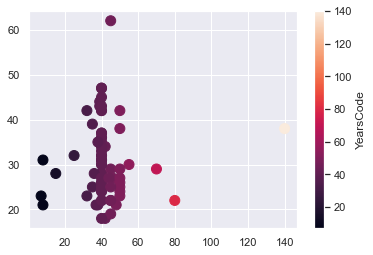

In [70]:

#Cleaning the YearsCode Series
below1Year = df["YearsCode"].replace("Less than 1 year", 0, inplace = True)
aboveFifty = df["YearsCode"].replace("More than 50 years", 51, inplace = True)

#Cleaning the Age1stCode Series
belowFiveYrs = df["Age1stCode"].replace("Younger than 5 years", 4, inplace = True)
aboveEightyFive = df["Age1stCode"].replace("Older than 85", 86, inplace = True)

dataset = df["YearsCode"].to_frame().astype(str).join(df["Age1stCode"].to_frame().astype(str))
dataset.dropna(axis = "index", how = "any", inplace = True)

dataset[["YearsCode", "Age1stCode"]]

#yearsCode = df["YearsCode"].dropna(axis = "index", how = "any").astype(int)
#age1stCode = df["Age1stCode"].dropna(axis = "index", how = "any").astype(int)

#analyse other float type data series
sal = df["ConvertedComp"].head(100)
workHrs = df["WorkWeekHrs"].head(100)

#Plotting the data in Scatter Plots and joining them to a Subplot
plt.scatter(workHrs, df["Age"].head(100), s = 100, c = workHrs)
cbar = plt.colorbar()
cbar.set_label("YearsCode")
#plt.xscale("log")
#plt.yscale("log")
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [10]:
import random
import datetime

t = datetime.datetime.today()
n = str(random.sample(range(1, 100), k = 1)).replace("[", "")
c = str(n).replace("]", "")
s = "C0" + str(c) + str(t.second) + "/" + str(t.month) + str(t.day)  
#print(t.day)
s
r = random.sample(range(0, 100000), k = 1)
r

[68300]

In [9]:
#Using f string function to separate a large number
from random import randint
num1 = 1000000000000
num2 = 19878634981863

cents = randint(1, 9)
total = num1 + num2
print (total) #Outputs large number
print (f'${total:,}.{cents}')


20878634981863
$20,878,634,981,863.7


In [1]:
import calendar
import datetime

day = int(input("Enter date of birth : "))
month = int(input("Enter Month of Birth : "))
yr = int(input("Enter Year of Birth : "))
dob = str(day) + "-" + str(month) + "-" + str(yr)
dob = datetime.datetime(int(dob))
#calendar.calendar(dob)

Enter date of birth :  09
Enter Month of Birth :  04
Enter Year of Birth :  1998


ValueError: invalid literal for int() with base 10: '9-4-1998'

In [ ]:
admin_password = "admin"
attempts = 0
total_trials = 3
incorrect_password = False
while total_trials >= attempts and incorrect_password != True:
    try:
        password = input("Administration Password : ")
        if password != admin_password:
            attempts += 1
            print("Incorrect Password. \nPlease Try Again...")
            incorrect_password = False
        else:
            print("Login Successful....")

    except:
        # attempts += 1
        raise ("Kindly Contact the Admin ", ValueError)

In [55]:
k = 0
def solution(number):
    for i in range(0, 9):
        if i%3 == 0 or i%5 == 0:
            j = k + i
            if i%3 == 0:
                m = j + i
            elif i%5 == 0:
                l = m + i
            else:
                print(0)
        else:
            return 0
    print(l + m)
solution(0)

0

In [46]:
k = 0
if i%3 == 0:
    m = k + i
elif i%5 == 0:
    m += i
print(m)

12


In [13]:
import time

start_time = time.time()
# Code to check follows
a, b = 1,2
c = a+ b
# Code to check ends
end_time = time.time()
time_taken_in_micro = (end_time - start_time)*(10**6)

print(" Time taken in micro_seconds: {0} ms".format(time_taken_in_micro))

 Time taken in micro_seconds: 0.0 ms


3